# Letterboxd Movie Reviews – EDA

This notebook does basic exploration of the raw Letterboxd reviews dataset and the cleaned version.

Goals:

- Load `letterboxd-reviews.csv`
- Look at rating distribution
- Look at review lengths
- See a few example reviews
- Load `cleaned_reviews.csv` and compare row counts
- Inspect the sentiment labels we created from the star ratings

# Imports and load raw data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", 50)

In [3]:
raw_path = "/Users/sanjaydilip/Desktop/Code/Projects/letterboxd movie sentiment api/data/raw/letterboxd-reviews.csv"
df_raw = pd.read_csv(raw_path, encoding="latin1")
df_raw.head()

,Movie name,Release Year,Rating,Reviewer name,Review date,Review,Comment count,Like count
0,Aftersun (2022),2022,â??â??â??â??Â½,Tuomas,12-Jan-20,This review may contain spoilers.,130,"22,44 6 likes"
1,Joker (2019),2019,â??â??â??â??â??,Joao,20-Dec-22,if youâ??ve never swam in the ocean then of co...,1.8K,"22,032 likes"
2,Puss in Boots: The Last Wish (2022),2022,â??Â½,NicoPico,15-Sep-22,Puss in Boots: Into the Pussy-Verse,6 2,"21, 6 6 6 likes"
3,The Banshees of Inisherin (2022),2022,â??â??â??â??â??,Ella Kemp,8-Apr-22,I will NOT leave my donkey outside when Iâ??m sad,NaN,"21, 6 09 likes"
4,Everything Everywhere All at Once (2022),2022,â??â??Â½,CosmonautMarkie,14-Aug-19,Watch it and have fun before film Twitter tell...,355,"20, 6 88 likes"


# Basic info on raw data

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Movie name     4596 non-null   object
 1   Release Year   4578 non-null   object
 2   Rating         4287 non-null   object
 3   Reviewer name  4596 non-null   object
 4   Review date    4370 non-null   object
 5   Review         3560 non-null   object
 6   Comment count  4273 non-null   object
 7   Like count     3318 non-null   object
dtypes: object(8)
memory usage: 287.4+ KB


# Raw ratings distribution

These ratings are stored as broken star symbols in the CSV.  
We only inspect how many distinct values we have here.

In [5]:
df_raw["Rating"].value_counts(dropna=False).head(20)

Rating
â??â??â??â??â??    1184
â??â??â??â??        961
â??â??â??â??Â½      796
â??â??â??Â½         462
â??â??â??           313
NaN                 309
â??â??              160
â??â??Â½            157
â??Â½                95
â??                  89
Â½                   70
Name: count, dtype: int64

In [6]:
df_raw[["Movie name", "Rating"]].sample(10, random_state=42)

,Movie name,Rating
1393,Spider-Man 2,â??â??â??â??â??
2936,"Extremely Wicked, Shockingly Evil and Vile",NaN
1880,Mission: Impossible - Fallout,â??â??â??â??â??
505,The Killing of a Sacred Deer,NaN
869,Puss in Boots: The Last Wish,â??â??â??â??Â½
371,The Batman,â??â??â??â??
3726,Last Night in Soho,â??â??
1044,Portrait of a Lady on Fire,â??â??â??â??â??
23,Elvis (2022),â??â??
1189,"SalÃ², or the 120 Days of Sodom",NaN


# Raw data review length distribution

In [7]:
df_raw["review_length"] = df_raw["Review"].astype(str).str.len()
df_raw["review_length"].describe()

count    4596.000000
mean       79.833116
std       134.927904
min         1.000000
25%        17.000000
50%        56.000000
75%       101.000000
max      5336.000000
Name: review_length, dtype: float64

### Histogram

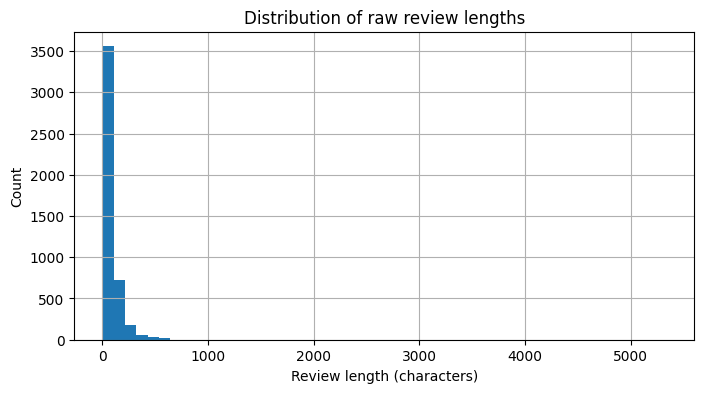

In [8]:
plt.figure(figsize=(8, 4))
df_raw["review_length"].hist(bins=50)
plt.xlabel("Review length (characters)")
plt.ylabel("Count")
plt.title("Distribution of raw review lengths")
plt.show()

# Load cleaned data and compare row counts

The cleaned dataset is created by our preprocessing script:

- drop rows without review text
- fix rating encoding into `rating_numeric`
- map ratings to `sentiment_label` (positive, neutral, negative)
- clean text into `clean_text`

In [9]:
clean_path = "/Users/sanjaydilip/Desktop/Code/Projects/letterboxd movie sentiment api/data/processed/cleaned_reviews.csv"
df_clean = pd.read_csv(clean_path)

In [10]:
print(f"Raw rows:{len(df_raw)}")
print(f"Cleaned rows: {len(df_clean)}")

Raw rows:4596
Cleaned rows: 3560


# Sentiment label distribution

Weak labels are created from the numeric star rating:

- rating >= 3.5  -> positive
- rating <= 2.5  -> negative
- otherwise -> neutral

In [11]:
df_clean["sentiment_label"].value_counts()

sentiment_label
positive    2667
neutral      486
negative     407
Name: count, dtype: int64

In [13]:
df_clean["sentiment_label"].value_counts(normalize=True).round(3)

sentiment_label
positive    0.749
neutral     0.137
negative    0.114
Name: proportion, dtype: float64

# Clean review length distribution

The length of the cleaned text in `clean_text` is reviewed

In [14]:
df_clean["clean_length"] = df_clean["clean_text"].astype(str).str.len()
df_clean["clean_length"].describe()

count    3560.000000
mean       93.586798
std        84.238108
min         2.000000
25%        42.000000
50%        70.000000
75%       112.000000
max       628.000000
Name: clean_length, dtype: float64

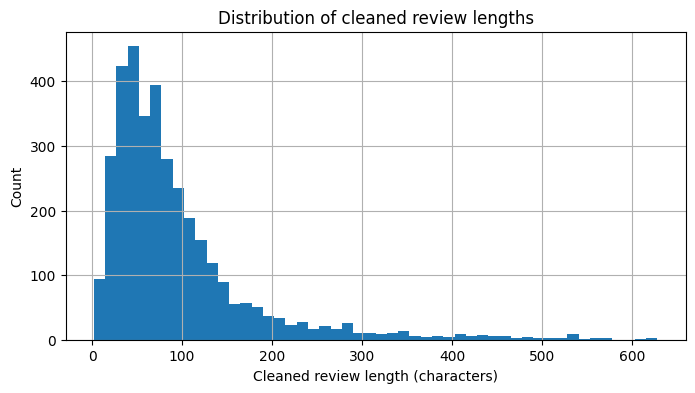

In [15]:
plt.figure(figsize=(8, 4))
df_clean["clean_length"].hist(bins=50)
plt.xlabel("Cleaned review length (characters)")
plt.ylabel("Count")
plt.title("Distribution of cleaned review lengths")
plt.show()

# Positive and Negative reviews

Few samples from each label are looked at to get an intuition

In [16]:
df_clean[df_clean["sentiment_label"] == "positive"][
    ["movie_title", "rating_numeric", "review_text"]
].head(5)

,movie_title,rating_numeric,review_text
0,Aftersun (2022),4.5,This review may contain spoilers.
1,Joker (2019),5.0,if youâ??ve never swam in the ocean then of co...
3,The Banshees of Inisherin (2022),5.0,I will NOT leave my donkey outside when Iâ??m sad
5,Parasite (2019),4.0,This review may contain spoilers.
8,The Menu (2022),5.0,This review may contain spoilers.


In [17]:
df_clean[df_clean["sentiment_label"] == "negative"][
    ["movie_title", "rating_numeric", "review_text"]
].head(5)

,movie_title,rating_numeric,review_text
2,Puss in Boots: The Last Wish (2022),1.5,Puss in Boots: Into the Pussy-Verse
4,Everything Everywhere All at Once (2022),2.5,Watch it and have fun before film Twitter tell...
19,Avatar: The Way of Water (2022),2.0,james cameron had 13 years to change the font ...
23,Elvis (2022),2.0,Congrats to Baz Luhrmann for making the worldâ...
27,Turning Red (2022),2.0,miriam talking about boys while wearing that g...


In [ ]:
df_clean[df_clean["sentiment_label"] == "positive"].sample(5, random_state=1)[
    ["movie_title", "rating_numeric", "review_text"]
]

,movie_title,rating_numeric,review_text
3119,Red Eye,3.5,cillian murphy: [choking rachel mcadams out in...
358,X (2022),3.5,The Texas Backshot Massacre
2298,Titanic,5.0,my life has never known peace since rose stare...
2430,Lars and the Real Girl,4.0,200 6 ryan gosling dated a life-size doll so...
3396,The Power of the Dog,4.0,The Power of the Dick


In [19]:
df_clean[df_clean["sentiment_label"] == "negative"].sample(5, random_state=2)[
    ["movie_title", "rating_numeric", "review_text"]
]

,movie_title,rating_numeric,review_text
132,Avatar: The Way of Water (2022),2.5,That frame rate got me waiting to pick up the ...
1663,Hawkeye,2.5,It took them 9 years but they finally got me t...
459,Dune,2.5,"So iâ??m sitting there, sand on my titties"
1758,Avatar: The Way of Water,2.0,Avatar: The Way of Water is like dating someon...
1505,Pinocchio,0.5,it was cool when the clock had woody and break...


# Summary

- The raw dataset has many rows without written reviews.
- After cleaning, we keep only the rows with non empty review text, which gives us around 3.5K reviews.
- The label distribution is skewed toward positive due to how people rate on Letterboxd.
- Review text is short on average, with a lot of noisy, informal language.
- This cleaned dataset will be used to train a simple sentiment model in the next notebook.